# SD-TSIA204 Statistics: Linear Models 
Télécom Paris - Institut Polytechnique de Paris

TP02 - Linear regression | 17 February 2023

 **Artur Dandolini Pescador**
 

 -------


In [1]:
# Change here using YOUR own first and last names
fn1 = "artur"
ln1 = "dandolini_pescador"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [2]:
print("filename: ",filename)

filename:  sd-tsia204_lab2_dandolini_pescador_artur.ipynb


# Importing packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNet
from sklearn import linear_model, feature_selection, decomposition, utils
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
# set colorblind palette
sns.set(style='darkgrid', palette='colorblind')
plt.style.use('tableau-colorblind10')

# Preprocessing the data

**1) Preprocess the data.**

**a) Set the random seed to 0.**

In [5]:
np.random.seed(0)

**b) Load the data. Print the mean, and standart deviation of every covariante.**

In [6]:
# loading the data
df = pd.read_csv('meatspec.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [7]:
# overview of the data mean and std of each feature
df.describe()[1:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,...,3.178262,3.158254,3.138534,3.119104,3.099971,3.08107,3.062290,3.043548,3.024895,18.142326
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,...,0.541957,0.541776,0.541519,0.541135,0.540563,0.53973,0.538586,0.537108,0.535354,12.740297


**Question:** Is the data centered? Normalized? Standardized?

**Ans:** The data is not centered. The data is not normalized, as its values are not all in [0,1]. Finally, it is not standardized as the mean is different from zero and the standart deviation is different from one.

**c) Separate the data in train and test sets and standardize both the training and testing.**

In [8]:
X = np.array(df.iloc[:, :-1])  # all columns except last
y = np.array(df.iloc[:, -1])  # last column

# Separating the data into training and test sets
# test_size: 1/4 of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
# standarling both train and test sets
sc = StandardScaler()

X_train = sc.fit_transform(X_train)  # fit and transform
X_test = sc.transform(X_test)  # only transform

y_train = sc.fit_transform(y_train.reshape(-1, 1))  # fit and transform
y_test = sc.transform(y_test.reshape(-1, 1))  # only transform

**d) Fit a regular OLS.**

In this section, the OLS regression will be applied to the data, which solves the following optimization problem:

$$\hat{\theta}_n \in argmin \left(||Y-Z\theta||_2^2 \right) $$

In [10]:
# Fitting a regular OLS model
reg = LinearRegression()
_ = reg.fit(X_train, y_train)

**Question:** Do we need to fit the intercept?

**Ans:** No. When a variable is centred around zero or when the data has been normalized, the intercept is not needed to be included in the model.

**e) Create a dataFrame df_coef and store the R2 coefficients of the estimated model.**

In [11]:
# Computing the R2 score with the test set
r2_regular_OLS_test = reg.score(X_test, y_test)

# Computing the R2 score with the train set
r2_regular_OLS_train = reg.score(X_train, y_train)

# Computing the MSE with the test set
y_pred = reg.predict(X_test)
mse_regular_OLS_test = np.mean((y_pred - y_test) ** 2)

# Computing the MSE with the train set
y_pred = reg.predict(X_train)
mse_regular_OLS_train = np.mean((y_pred - y_train) ** 2)

# Printing results
print("Regular OLS model:")
print("R2 score (test):", r2_regular_OLS_test)
print("R2 score (train):", r2_regular_OLS_train)
print("MSE (test):", mse_regular_OLS_test)
print("MSE (train):", mse_regular_OLS_train)

Regular OLS model:
R2 score (test): 0.9600547778010704
R2 score (train): 0.9957887286912317
MSE (test): 0.04011145757667599
MSE (train): 0.004211271308768258


In [12]:
# Creating an empty DataFrame to store the results
df_coef = pd.DataFrame()

# Saving the R2 score into the DataFrame
df_coef['Method'] = ['Regular OLS']
df_coef['R2 - test'] = [r2_regular_OLS_test]
df_coef['R2 - train'] = [r2_regular_OLS_train]
df_coef['MSE - test'] = [mse_regular_OLS_test]
df_coef['MSE - train'] = [mse_regular_OLS_train]

# Variable selection

**2) Program the method of the forward variable selection (do not define the stop criterion for the method).**


In [13]:
# Forward variable selection
def forward_selection(X, y):
    """
    Performs forward selection on the data X and y.
    Returns the list of selected columns and the list of p-values for the selected columns.

    Parameters:
    X: array of features
    y: array of target
    """
    k = np.shape(X)[1]  # number of columns in X
    r = np.copy(y)  # copy of y

    selected_columns = []  # list of selected columns
    p_values_sel_col = []  # list of p-values for the selected columns

    # Loop over all columns
    # for i in range(k):
    while len(selected_columns) < k:
        # List of columns that are not in the model
        remaining_columns = list(set(range(k)) - set(selected_columns))

        # List of p-values for the remaining columns
        p_values = []  # list of p-values
        regs = []  # list of regression models

        for j in remaining_columns:
            temp_reg = sm.OLS(r, X[:, j]).fit()  # fit the model
            p_values.append(temp_reg.pvalues[0])
            regs.append(temp_reg)

        # Select the column with the lowest p-value
        min_p_value = min(p_values)

        min_p_value_index = p_values.index(min_p_value)  # index of the minimum p-value

        selected_columns.append(remaining_columns[min_p_value_index])  # add the column with the minimum p-value to the model
        p_values_sel_col.append(p_values[min_p_value_index])  # add the p-value of the selected column to the list

        # Remove the column with the lowest p-value from the remaining columns
        remaining_columns.remove(remaining_columns[min_p_value_index])

        # Updating for the next iteration
        r = regs[min_p_value_index].resid

    return selected_columns, p_values_sel_col

In [14]:
# forward variable selection
sel_col1, pvalue_sel_col1 = forward_selection(X_train, y_train) 
print("Forward variable selection:")
print("Selected columns (index): ", sel_col1)
print("P-values: ", pvalue_sel_col1)

Forward variable selection:
Selected columns (index):  [40, 7, 39, 6, 41, 8, 38, 5, 42, 9, 37, 4, 36, 10, 97, 3, 43, 11, 35, 2, 96, 12, 98, 13, 34, 1, 44, 0, 95, 14, 33, 15, 99, 16, 32, 17, 94, 18, 93, 19, 45, 64, 31, 65, 92, 63, 91, 66, 90, 67, 30, 20, 89, 62, 88, 68, 46, 61, 87, 69, 86, 60, 85, 53, 29, 52, 84, 70, 83, 54, 28, 59, 82, 21, 47, 55, 81, 58, 27, 51, 80, 71, 26, 56, 79, 57, 48, 72, 78, 50, 25, 22, 77, 73, 24, 74, 76, 75, 49, 23]
P-values:  [8.225788712713993e-15, 0.05171441634415376, 0.054107845677557796, 0.05491796094532149, 0.05907372895802301, 0.060235353885387935, 0.06492716398777887, 0.06614610880976063, 0.07805079128648817, 0.07963632308638344, 0.08225523012758934, 0.08422277697104091, 0.10351072803265536, 0.10489240971702708, 0.11600820239338179, 0.12765976743937596, 0.12434830689958876, 0.12582683444020823, 0.13751429220076178, 0.14266440171587255, 0.1537526007778554, 0.1637576201927913, 0.17485536238131733, 0.19277497722600948, 0.18671207303436094, 0.1884873078250

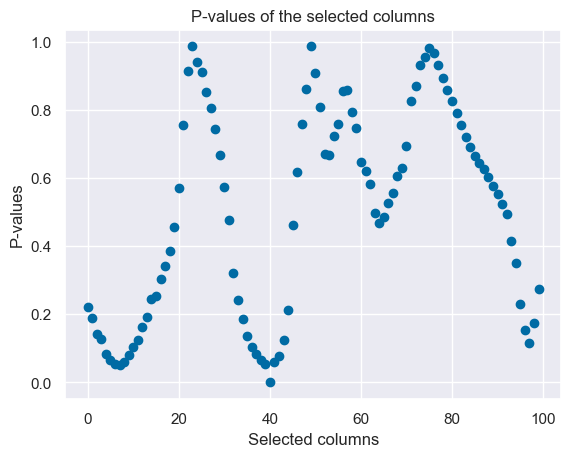

In [15]:
# plotting the p-values of the selected columns (forward selection)
plt.scatter(sel_col1, pvalue_sel_col1)
plt.title("P-values of the selected columns")
plt.xlabel("Selected columns")
plt.ylabel("P-values")
plt.show()

**3) Run OLS on the variables with a p-value smaller than 0.05**

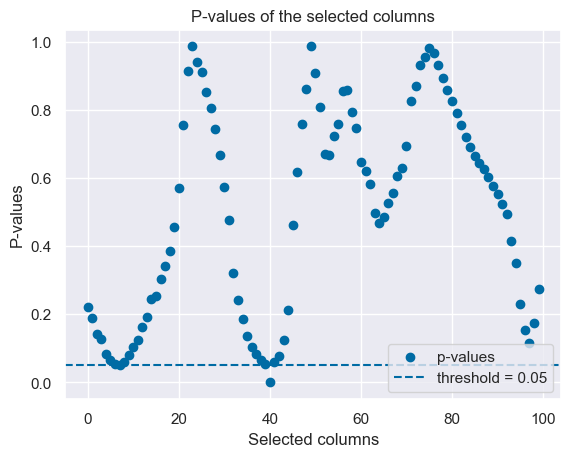

In [16]:
# Plotting the p-values of the selected columns and the threshold
# p-value threshold = 0.05
# cololor blind accessible
plt.scatter(sel_col1, pvalue_sel_col1, label="p-values")
plt.axhline(y=0.05, label="threshold = 0.05", linestyle='--')
plt.title("P-values of the selected columns")
plt.xlabel("Selected columns")
plt.ylabel("P-values")
plt.legend()
plt.show()

In [17]:
def forward_selection_threshold(X, y, threshold):
    """
    Performs forward selection on the data X and y.
    Returns the list of selected columns and the list of p-values for the selected columns.

    Parameters:
    X: array of features
    y: array of target
    threshold: threshold for the p-value
    """
    k = np.shape(X)[1]
    r = np.copy(y)

    selected_columns = []
    p_values_sel_col = []

    while len(selected_columns) < k:
        remaining_columns = list(set(range(k)) - set(selected_columns))

        p_values = []
        regs = []
        
        for j in remaining_columns: 
            temp_reg = sm.OLS(r, X[:, j]).fit()
            p_values.append(temp_reg.pvalues[0])
            regs.append(temp_reg)            

        min_p_value = min(p_values)
    
        min_p_value_index = p_values.index(min_p_value)

        if min_p_value < threshold:
            selected_columns.append(remaining_columns[min_p_value_index])
            p_values_sel_col.append(p_values[min_p_value_index])

            remaining_columns.remove(remaining_columns[min_p_value_index])

            r = regs[min_p_value_index].resid
        else:
            break

    return selected_columns, p_values_sel_col

In [18]:
# forward variable selection on the train set
# threshold = 0.05
threshold = 0.05
sel_col2, pvalue_sel_col2 = forward_selection_threshold(X_train, y_train, threshold) 
print("Forward variable selection with threshold:")
print("The selected columns are: ", sel_col2)
print("The p-values of the selected columns are: ", pvalue_sel_col2)

Forward variable selection with threshold:
The selected columns are:  [40]
The p-values of the selected columns are:  [8.225788712713993e-15]


In [19]:
# running the OLS model on the selected columns
reg = sm.OLS(y_train, X_train[:, sel_col2])
reg = reg.fit()

# computing the R2 score of the forward selection model (test set)
y_pred = reg.predict(X_test[:, sel_col2])
r2_forward_sel_test = r2_score(y_test, y_pred)

# computing the MSE of the forward selection model (test set)
mse_forward_sel_test = mean_squared_error(y_test, y_pred)

# computing the R2 score of the forward selection model (train set)
y_pred = reg.predict(X_train[:, sel_col2])
r2_forward_sel_train = r2_score(y_train, y_pred)

# computing the MSE of the forward selection model (train set)
mse_forward_sel_train = mean_squared_error(y_train, y_pred)

# storing the R2 and MSE scores of the forward selection model into the dataframe
df_coef = pd.concat([df_coef, pd.DataFrame({'Method': 'Forward selection', 
                                            'R2 - test': r2_forward_sel_test,
                                            'R2 - train': r2_forward_sel_train,
                                            'MSE - test': mse_forward_sel_test,
                                            'MSE - train': mse_forward_sel_train}, index=[0])], ignore_index=True)

print("Forward variable selection with threshold:")
print("R2 score (test): ", r2_forward_sel_test)
print("R2 score (train): ", r2_forward_sel_train)
print("MSE (test): ", mse_forward_sel_test)
print("MSE (train): ", mse_forward_sel_train)

Forward variable selection with threshold:
R2 score (test):  0.12713946972367152
R2 score (train):  0.3146976272215324
MSE (test):  0.8764930122599758
MSE (train):  0.6853023727784674


**4) Using SequentialFeatureSelector on a linear regression estimator select (with forward selection), select the same number of variables as in the previous question.** 

In [20]:
# Using SequentialFeatureSelector from sklearn
# forward variable selection with threshold using SequentialFeatureSelector
# threshold = 0.05
reg = linear_model.LinearRegression().fit(X_train, y_train)

n_features_to_select = len(sel_col2)

sfs = SequentialFeatureSelector(reg, n_features_to_select=n_features_to_select)
sfs.fit(X_train, y_train)

# print the selected columns
print("Forward variable selection with threshold using SequentialFeatureSelector:")
print("The selected columns are: ", sfs.get_support(indices=True))

Forward variable selection with threshold using SequentialFeatureSelector:
The selected columns are:  [40]


In [21]:
x_train_sel = sfs.transform(X_train)
reg2 = LinearRegression().fit(x_train_sel, y_train)

# compute the r2 score of the forward selection test set
y_pred = reg2.predict(sfs.transform(X_test))
r2_score_sfs_test = r2_score(y_test, y_pred)

# compute the MSE of the forward selection
mse_sfs_test = mean_squared_error(y_test, y_pred)

# compute the r2 score of the forward selection train set
y_pred = reg2.predict(sfs.transform(X_train))
r2_score_sfs_train = r2_score(y_train, y_pred)

# compute the MSE of the forward selection
mse_sfs_train = mean_squared_error(y_train, y_pred)

# store the r2 and mse score of the forward selection model into the dataframe
df_coef = pd.concat([df_coef, pd.DataFrame({'Method': 'Forward selection (sklearn)', 'R2 - test': r2_score_sfs_test,\
                                                                        'R2 - train': r2_score_sfs_train,\
                                                                        'MSE - test': mse_sfs_test,\
                                                                        'MSE - train': mse_sfs_train}, index=[0])], ignore_index=True)

print("Forward variable selection with threshold (sklearn):")
print("R2 score (test): ", r2_score_sfs_test)
print("R2 score (train): ", r2_score_sfs_train)
print("MSE (test): ", mse_sfs_test)
print("MSE (train)", mse_sfs_train)

Forward variable selection with threshold (sklearn):
R2 score (test):  0.12713946972367152
R2 score (train):  0.3146976272215324
MSE (test):  0.8764930122599758
MSE (train) 0.6853023727784674


**Question:** Why the 2 algorithms do not return the same variables?

**Ans:** Both algorithms use a forward variable selection approach, starting with a single feature (i.e., the intercept term) and iteratively adding more features one at a time. The selection of the next feature depends on a criterion used by each algorithm. The SequentialFeatureSelector algorithm uses cross-validation performance, while the p-value threshold algorithm (the one developed above in this notebook) uses the significance of the added feature as determined by the p-value of the OLS regression model.

While the performance metric used by the SequentialFeatureSelector algorithm and the p-values obtained by the OLS regression model in the p-value threshold algorithm may be correlated, this is not guaranteed. The two algorithms may select different sets of features, depending on the specific dataset and the chosen performance metric or p-value threshold.


# Ridge

**5) Code your own ridge estimator using expression derived in class. Test it for a penalty parameter α spaced evenly on a log scale 10e-9 to 10e2.**

In this section, the Ridge regression will be applied to the data, which solves the following optimization problem:
    
$$\hat{\theta}_n \in argmin \left(||Y-Z\theta||_2^2 + \alpha||\theta||^2\right) $$

In [22]:
n_alpha = 100
alphas = np.logspace(-8, 1, n_alpha)

train_mse = []  # list of MSE on the train set
test_mse = []  # list of MSE on the test set
coefs_ridge = []  # list of coefficients
n = X_train.shape[1]  # number of features

for alpha in alphas:  # loop over all alpha values
    A = X_train.T @ X_train + n*alpha * np.identity(X_train.shape[1])
    theta = np.linalg.inv(A) @ X_train.T @ y_train
    coefs_ridge.append(theta)
    train_mse.append(mean_squared_error(y_train, X_train @ theta))
    test_mse.append(mean_squared_error(y_test, X_test @ theta))

coefs_ridge = np.array(coefs_ridge)

train_mse = np.array(train_mse)
test_mse = np.array(test_mse)

**a) Plot how the values of the coefficients change with α**

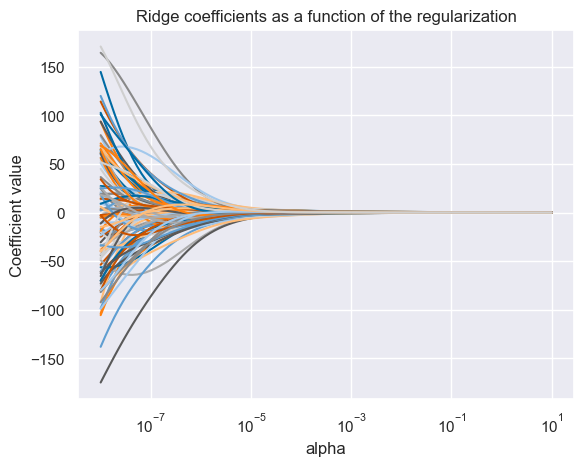

In [23]:
# plot how the values of the coefficients change with alpha
for i in range(coefs_ridge.shape[1]):
    plt.plot(alphas, coefs_ridge[:, i])

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficient value')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

As the value of alpha increases, the penalty becomes more important in the objective functions that is being minimized. As a result, in order to minimize the objective function, the coefficients of the model will tend to zero. This is what is observed in the plot above.

**b) Plot how MSE of both the train and test sets change with α. Signal the minimum with a
point.**

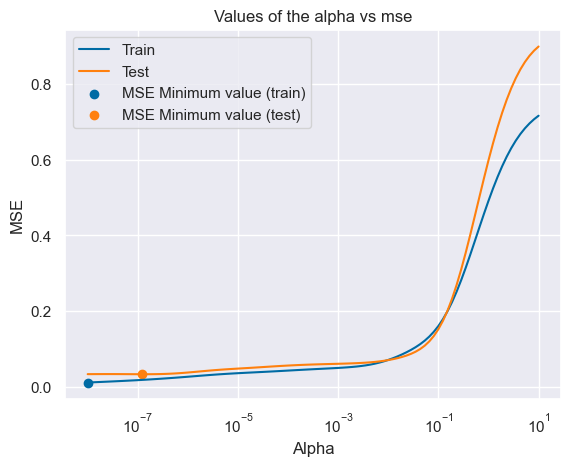

In [24]:
# plot the values of the alpha vs mse for the test set and for the train set
plt.plot(alphas, train_mse, label = "Train") # train set
plt.plot(alphas, test_mse, label = "Test") # test set

# plot the minimum value of the mse
# using tableu_10 to color the points
plt.scatter(alphas[np.argmin(train_mse)], np.min(train_mse),  label="MSE Minimum value (train)")
plt.scatter(alphas[np.argmin(test_mse)], np.min(test_mse), label="MSE Minimum value (test)")

plt.title("Values of the alpha vs mse")
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("MSE")
plt.legend()
plt.show()

**c) For the best performing value of α (the one with smallest training error) store the R2 results.**

In [25]:
# best alpha value
best_alpha = alphas[np.argmin(test_mse)]

# compute the r2 score of the ridge regression test
y_pred = X_test @ coefs_ridge[np.argmin(test_mse)]
r2_ridge_test = r2_score(y_test, y_pred)

# compute the MSE of the ridge regression test
mse_ridge_test = mean_squared_error(y_test, y_pred)

# compute the r2 score of the ridge regression train
y_pred = X_train @ coefs_ridge[np.argmin(test_mse)]
r2_ridge_train = r2_score(y_train, y_pred)

# compute the MSE of the ridge regression train
mse_ridge_train = mean_squared_error(y_train, y_pred)

# store the r2 and MSE score of the ridge regression model into the dataframe
df_coef = pd.concat([df_coef, pd.DataFrame({
    'Method': 'Ridge regression',
    'R2 - test': r2_ridge_test,
    'R2 - train': r2_ridge_train,
    'MSE - test': mse_ridge_test,
    'MSE - train': mse_ridge_train
}, index=[0])], ignore_index=True)

print("Ridge regression:")
print("R2 (test):", r2_ridge_test)
print("R2 (train):", r2_ridge_train)
print("MSE (test):", mse_ridge_test)
print("MSE (train):", mse_ridge_train)

Ridge regression:
R2 (test): 0.9671204833857759
R2 (train): 0.9819285407382855
MSE (test): 0.03301634746816856
MSE (train): 0.01807145926171453


**Checking the R2 score with RIDGE from sklearn**

In [26]:
# Checking the R2-score for the best alpha value using sklearn
reg = Ridge(alpha=best_alpha)
reg.fit(X_train, y_train)

# compute the r2 score of the ridge regression
y_pred = reg.predict(X_test)
r2_ridge_sklearn = r2_score(y_test, y_pred)

# compute the MSE of the ridge regression
mse_ridge_sklearn = mean_squared_error(y_test, y_pred)

print("Ridge regression (sklearn):")
print("R2 score of the ridge regression model: ", r2_ridge_sklearn)
print("MSE score of the ridge regression model: ", mse_ridge_sklearn)

Ridge regression (sklearn):
R2 score of the ridge regression model:  0.9687940747502352
MSE score of the ridge regression model:  0.03133579131349543


As it is possible to see abobe, the R2 score is the same for both the RIDGE from sklearn and the RIDGE implemented by myself.

# Crossvalidation, Lasso and elastic net

**6) Use the sklearn version of the Lasso. Test it for a penalty parameter α spaced evenly on a log scale 10e-5 to 10e-2.**

In this section, the Lasso regression will be applied to the data, which solves the following optimization problem:
    
$$\hat{\theta}_n \in argmin \left(\frac{1}{2}||Y-Z\theta||_2^2 + \alpha||\theta||_1\right) $$

In [27]:
def lasso_regression(X, y, alphas, max_iter=1000, tol=0.0001):
    """
    Computes the lasso regression with the given the list of alpha values.
    Returns the estimated coefficients and the mse.

    Parameters:
    X: array of features
    y: array of target
    alphas: list of alpha values
    max_iter: maximum number of iterations for the Lasso algorithm (default 1000)
    tol: tolerance for stopping criterion (default 0.0001)
    """
    n = X.shape[1] # number of columns in X

    # initialize the list of coefficients and the list of mse (empty lists)
    coefs = []
    mse = []
    
    for alpha in alphas:
        # compute the coefficients
        reg = Lasso(alpha=alpha, fit_intercept=False, max_iter=max_iter, tol=tol)
        reg.fit(X, y)
        coef = reg.coef_
        coefs.append(coef)

        # compute the mse
        y_pred = X @ coef
        mse.append(mean_squared_error(y, y_pred))
            
    return coefs, mse

**a) To avoid having warnings and error you want to decrease the parameter tol or increase
max_iter.**

In [28]:
# Lasso regression (using sklearn library)
n_alpha = 100
alpha = np.logspace(-4, -1, n_alpha)  # list of alpha values

# parameters for the lasso regression
max_iter = 1000000
tol = 1e-2

# compute the lasso regression (train set)
coefs_lasso_train, mse_lasso_train = lasso_regression(X_train, y_train, alpha, max_iter, tol)

# compute the lasso regression (test set)
coefs_lasso_test, mse_lasso_test = lasso_regression(X_test, y_test, alpha, max_iter, tol)

coefs_lasso_train = np.array(coefs_lasso_train)
coefs_lasso_test = np.array(coefs_lasso_test)

**Question:** Elaborate on why these warning arise and on the solution.

**Ans:** The Lasso regression algorithm in scikit-learn uses an iterative optimization method called coordinate descent to minimize the following objective function: $$\hat{\theta}_n \in argmin \left(\frac{1}{2}||Y-Z\theta||_2^2 + \alpha||\theta||_1\right) $$


The max_iter parameter sets the maximum number of iterations the algorithm can perform, while the tol parameter sets the tolerance for the stopping criterion, which determines when the algorithm has converged.

If max_iter or tol are not set to sufficiently large values, the algorithm may not be able to converge to a solution. In this case, scikit-learn will issue a warning to let you know that the algorithm did not converge. This warning can indicate that the results may not be reliable and that you may need to increase max_iter or tol to get a more accurate result.

**b) Plot the number of coefficients that are different from 0 for each value of α**

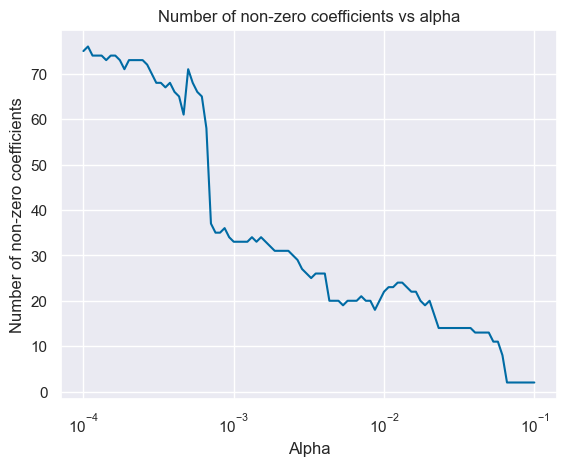

In [29]:
# plot the number of non-zero coefficients vs alpha
n_non_zero = [np.count_nonzero(coef) for coef in coefs_lasso_train]
plt.plot(alpha, n_non_zero)
plt.title("Number of non-zero coefficients vs alpha")
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("Number of non-zero coefficients")
plt.show()

When alpha is small, the penalty term has little effect on the objective function, and the modelo will tend to have many non-zero coefficients. As alpha increases, the penalty term becomes more relevant, and the model will tend to have fewer non-zero coefficients. This is what is observed in the plot above.

**c) Plot how MSE of both the train and test sets change with α. Signal the minimum with a point.**

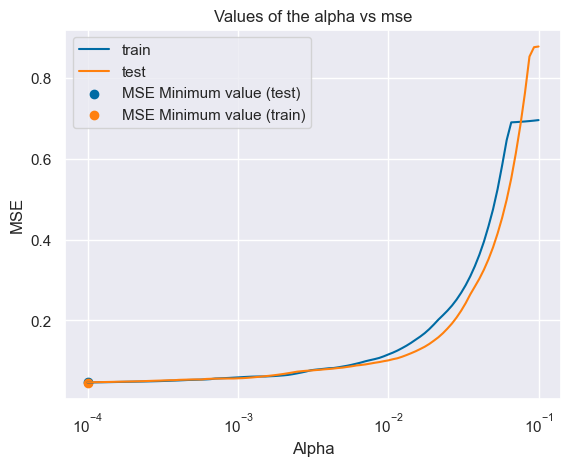

In [30]:
# plot the values of the alpha vs mse for the test set and for the train set
plt.plot(alpha, mse_lasso_train, label="train")  # train set
plt.plot(alpha, mse_lasso_test, label="test")  # test set

# plot the minimum value of the mse
plt.scatter(alpha[np.argmin(mse_lasso_test)], np.min(mse_lasso_test), label="MSE Minimum value (test)")
plt.scatter(alpha[np.argmin(mse_lasso_train)], np.min(mse_lasso_train), label="MSE Minimum value (train)")

plt.title("Values of the alpha vs mse")
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("MSE")
plt.legend()
plt.show()

**d) For the best performing value of α on the test set store the R2 results.**

In [31]:
# best alpha value (test set)
alpha_best = alpha[np.argmin(mse_lasso_test)]

# compute the r2 score of the lasso regression model test
y_pred = X_test @ coefs_lasso_test[np.argmin(mse_lasso_test)]
r2_lasso_test = r2_score(y_test, y_pred)

# compute the mse of the lasso regression model test
mse_lasso_test = mean_squared_error(y_test, y_pred)

# compute the r2 score of the lasso regression model train
y_pred = X_train @ coefs_lasso_train[np.argmin(mse_lasso_test)]
r2_lasso_train = r2_score(y_train, y_pred)

# compute the mse of the lasso regression model train
mse_lasso_train = mean_squared_error(y_train, y_pred)

# Store the R2 and MSE scores of the Lasso regression model into the dataframe
df_coef = pd.concat([df_coef, pd.DataFrame({
    'Method': 'Lasso regression', 
    'R2 - test': r2_lasso_test,
    'R2 - train': r2_lasso_train,
    'MSE - test': mse_lasso_test,
    'MSE - train': mse_lasso_train
}, index=[0])], ignore_index=True)

print("Lasso regression:")
print("The best alpha value is:", alpha_best)
print("R2 (test):", r2_lasso_test)
print("R2 (train):", r2_lasso_train)
print("MSE (test):", mse_lasso_test)
print("MSE (train):", mse_lasso_train)

Lasso regression:
The best alpha value is: 0.0001
R2 (test): 0.9537116114141907
R2 (train): 0.954032482299511
MSE (test): 0.04648102158015125
MSE (train): 0.04596751770048905


**7) Code your own version of the crossvalidation. Preferable, in the same way as sklearn’s version, the length of every pair of folds should differ at most by one. Use the sklearn version of the Elastic net. Validate with a cross-validation that you implement. Test it for a penalty parameter α-ridge
spaced evenly on a log scale 10e-10 to 10e3 and α-lasso in [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99].**

In [32]:
def cross_validation(model, X, y, k):
    """Compute the cross validation for the given model, data, and number of folds.
    Return the validation error."""
    # Split the data into k-folds.
    X_copy = np.array_split(X, k, axis=0)
    y_copy = np.array_split(y, k, axis=0)
    k_error = 0

    for i in range(k):
        # Validation data.
        Xk_validation = X_copy[i]
        yk_validation = y_copy[i]

        # Train data.
        Xk_train = np.concatenate(X_copy[:i] + X_copy[i+1:])
        yk_train = np.concatenate(y_copy[:i] + y_copy[i+1:])

        # Fit the model.
        model.fit(Xk_train, yk_train)

        # Obtain prediction.
        y_pred = model.predict(Xk_validation)

        # Compute error.
        k_error += mean_squared_error(yk_validation, y_pred)

    val_error = k_error / k

    return val_error

In [33]:
#alpha values
alpha_ridge_values = np.logspace(-9, 2)
alpha_lasso_values = [0, .1, .5, .7, .9, .95, .99]

mse_alpha = [] # store the error for each alpha value
prev_val_error = float('inf') # store the previous error (initially set to infinity)

for a_lasso in alpha_lasso_values:
    for a_ridge in alpha_ridge_values:
        # Elastic Net
        alpha = 2*a_ridge + a_lasso
        l1_ratio = a_lasso / (2*a_ridge + a_lasso)

        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=False, max_iter=10000, tol=0.1) #create the model

        # cross validation
        val_error = cross_validation(model, X_train, y_train, 3) #compute the error
        mse_alpha.append(val_error) # store the error
        if val_error < prev_val_error: # if the error is lower than the previous one
            print("--------")
            print(f"Previous error {prev_val_error} --> New error {val_error}")
            prev_val_error = val_error # update the previous error
            alpha_best = alpha # update the best alpha value
            l1_ratio_best = l1_ratio # update the best l1_ratio value
            print(f"Alpha Ridge = {alpha_best} | Alpha Lasso = {l1_ratio_best}")

--------
Previous error inf --> New error 0.22755654730544203
Alpha Ridge = 2e-09 | Alpha Lasso = 0.0
--------
Previous error 0.22755654730544203 --> New error 0.22755643384724544
Alpha Ridge = 3.35366587362202e-09 | Alpha Lasso = 0.0
--------
Previous error 0.22755643384724544 --> New error 0.22755624359696888
Alpha Ridge = 5.6235373959484505e-09 | Alpha Lasso = 0.0
--------
Previous error 0.22755624359696888 --> New error 0.22755592457951326
Alpha Ridge = 9.42973272691478e-09 | Alpha Lasso = 0.0
--------
Previous error 0.22755592457951326 --> New error 0.22755538964185817
Alpha Ridge = 1.5812086421815404e-08 | Alpha Lasso = 0.0
--------
Previous error 0.22755538964185817 --> New error 0.22755449264450256
Alpha Ridge = 2.6514227311802163e-08 | Alpha Lasso = 0.0
--------
Previous error 0.22755449264450256 --> New error 0.22755298854025688
Alpha Ridge = 4.4459929650523914e-08 | Alpha Lasso = 0.0
--------
Previous error 0.22755298854025688 --> New error 0.2275504664381329
Alpha Ridge = 7

C:\Users\Artur Pescador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+01, tolerance: 9.470e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Artur Pescador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regul

The cross-validation did not converge for the ElasticNet regression algorithm in scikit-learn. May we should increase the max_iter parameter but it would take too much time to run the algorithm.

One common issue that may cause Elastic Net regression to fail to converge is the presence of multicolinearity in the dataset. This can lead to instability in the model and so making it dificult for the optimization algorithm to find a solution.

Another issue that may cause Elastic Net regression to fail to converge is the selection of hyperparameters. The model as it is possible to see above has two hyperparameters: alpha and l1_ratio. If these hyperparameters are not set to appropriate values, the model may not converge to a solution.



# Bootstrap

**8.1) We are going to use only variable 40 of the dataset original (non-centered) X.**

In [34]:
# select the V40 column (original data - non-centered)
X_40 = np.array(df["V40"]).reshape(-1, 1)

**8.2) Plot the dataset and the regression line fitted with the whole sample.**

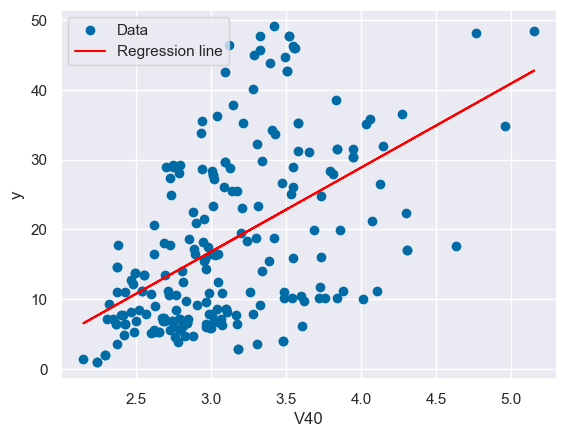

In [35]:
# regression model
reg = LinearRegression()
reg.fit(X_40, y)

# plot the data
plt.scatter(X_40, y, label='Data')
plt.plot(X_40, reg.predict(X_40),color= 'red', label='Regression line')
plt.xlabel("V40")
plt.ylabel("y")
plt.legend()
plt.show()

**8.3) Generate 50 bootstrap samples, for each of the samples fit a regression model and plot the 50 estimated regression lines in the same plot. Finally, in the same plot, plot the prediction intervals.**

In [36]:
# regression coefficients
beta0 = reg.intercept_
beta1 = reg.coef_[0]

# confidence interval for the regression line
alpha = 0.9  # confidence level

n = np.size(X_40)  # number of observations that we have
x_mean = np.mean(X_40)
y_mean = np.mean(y)
x_var = np.sum((X_40 - x_mean) ** 2)

# standard deviations
y_pred = reg.predict(X_40)
residual = y - y_pred
s2 = np.sum(residual ** 2) / (n - 2)  # variance of the residuals

# Confidence interval
#CI_S = beta0 + beta1 * X_40 + stats.t.ppf((1-alpha)/2, n-2) * np.sqrt(s2*(1/n + (X_40-x_mean)**2/x_var)) # upper bound
#CI_I = beta0 + beta1 * X_40 - stats.t.ppf((1-alpha)/2, n-2) * np.sqrt(s2*(1/n + (X_40-x_mean)**2/x_var)) # lower bound

# prediction interval
PI_S = beta0 + beta1 * X_40 + stats.t.ppf((1-alpha)/2, n-2) * np.sqrt(s2*(1 + 1/n + (X_40-x_mean)**2/x_var)) # upper bound
PI_I = beta0 + beta1 * X_40 - stats.t.ppf((1-alpha)/2, n-2) * np.sqrt(s2*(1 + 1/n + (X_40-x_mean)**2/x_var)) # lower bound

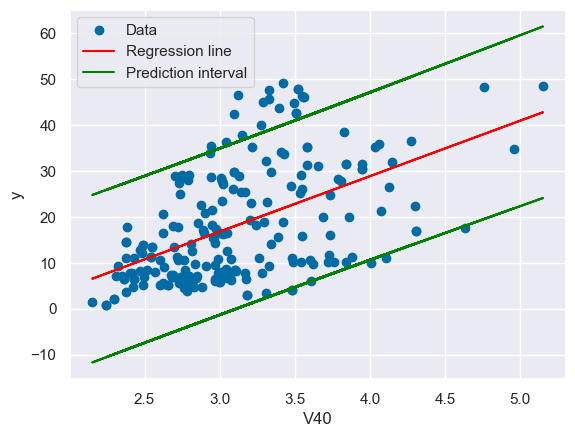

In [37]:
# regression model
reg = LinearRegression()
reg.fit(X_40, y)

# plot the data
plt.scatter(X_40, y, label='Data')
plt.plot(X_40, reg.predict(X_40),color= 'red', label='Regression line')
plt.plot(X_40, PI_S, color = 'green', label='Prediction interval')
plt.plot(X_40, PI_I, color = 'green',)

plt.xlabel("V40")
plt.ylabel("y")
plt.legend()
plt.show()

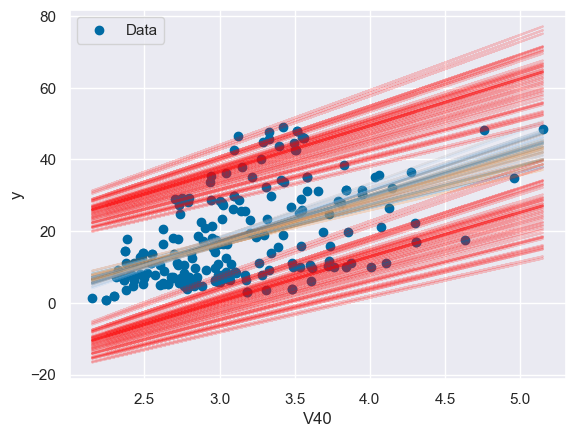

In [38]:
# Create an empty list to store the coefficients
coefs = []

# plot the data
plt.scatter(X_40, y, label='Data')
plt.xlabel("V40")
plt.ylabel("y")

# Generate 50 bootstrap samples
for i in range(50):
    X_sample, y_sample = resample(X_40, y)  # Generate a bootstrap sample
    model = LinearRegression().fit(X_sample, y_sample)
    coefs.append(model.coef_)  # Store the coefficients in the list
    # plot the regression line for each bootstrap sample
    plt.plot(X_40, model.predict(X_40), alpha=0.2)

# plot the prediction interval for each sample (50 samples)
for coef in coefs:
    PI_S = beta0 + coef * X_40 + stats.t.ppf((1-alpha)/2, n-2) * np.sqrt(s2*(1 + 1/n + (X_40-x_mean)**2/x_var)) # upper bound
    PI_I = beta0 + coef * X_40 - stats.t.ppf((1-alpha)/2, n-2) * np.sqrt(s2*(1 + 1/n + (X_40-x_mean)**2/x_var)) # lower bound
    plt.plot(X_40, PI_S, alpha=0.2, color='red')
    plt.plot(X_40, PI_I, alpha=0.2, color = 'red')

plt.legend()
plt.show()

# PCA

**9) Compute the covariance matrix. Compute the singular value decomposition of the covariance
matrix. For consistency in the notation use $U$, $S$, $V$ = $SVD(X^TX)$.**

In [39]:
# covariance matrix
cov_mat = np.cov(X_train.T)

# Singular value decomposition of the covariance matrix
U, S, V = np.linalg.svd(cov_mat)

**a) Plot a heatmap of the covariance matrix.**

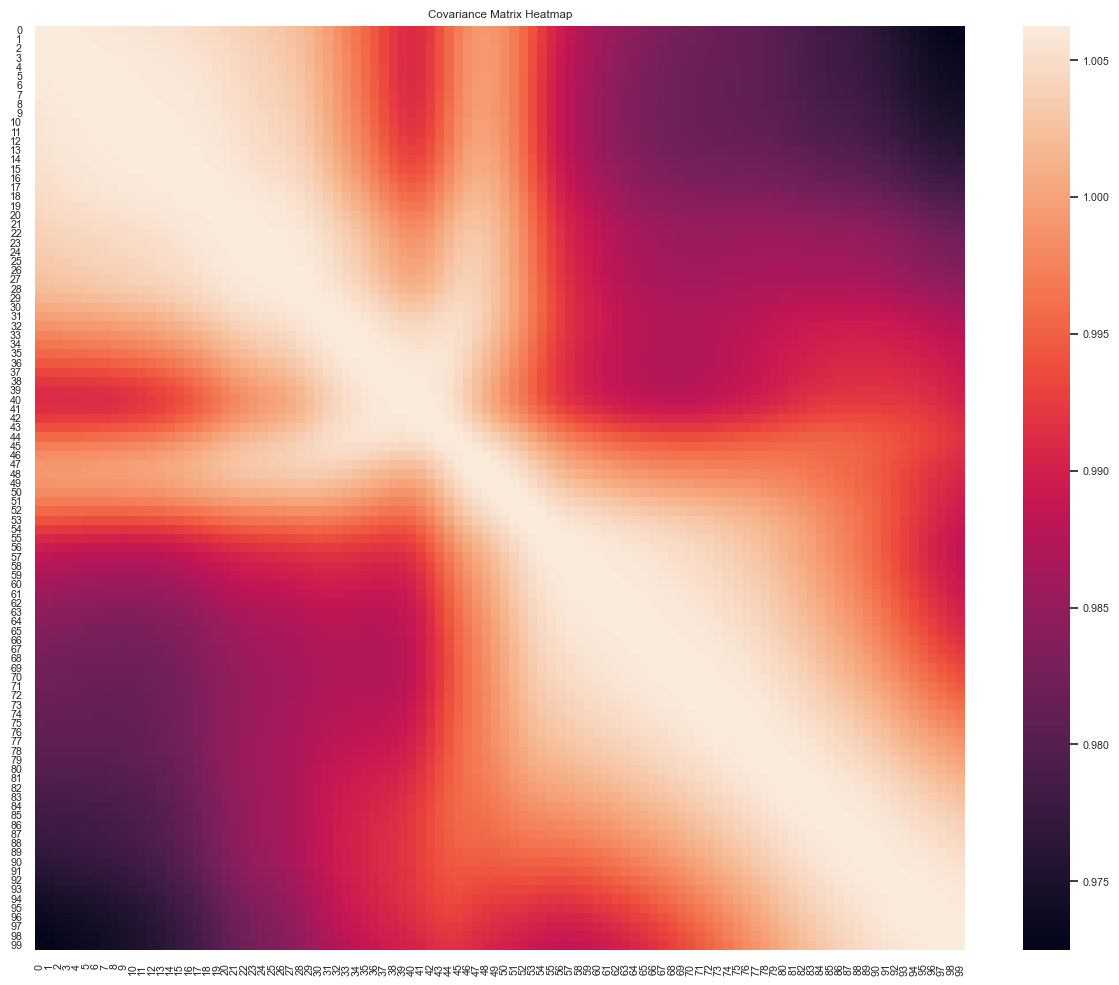

In [40]:
# Convariance matrix heatmap
plt.figure(figsize=(15, 12))
sns.set(font_scale=0.7)
sns.heatmap(cov_mat, xticklabels=True, yticklabels=True)
plt.title("Covariance Matrix Heatmap")
plt.show()

**b) In PCA we transform the data to a new coordinate system such that the greatest variance
by some scalar projection of the data lies on the first coordinate (called the first principal
component, PC1), the second greatest variance in the second PC and so on. The PCs are
computed given the above $SVD$, as $XU$. Instead of using the whole transformation, $XU$.**

**c) Plot the amount of variance explained by the first k components for k P 2..p.**

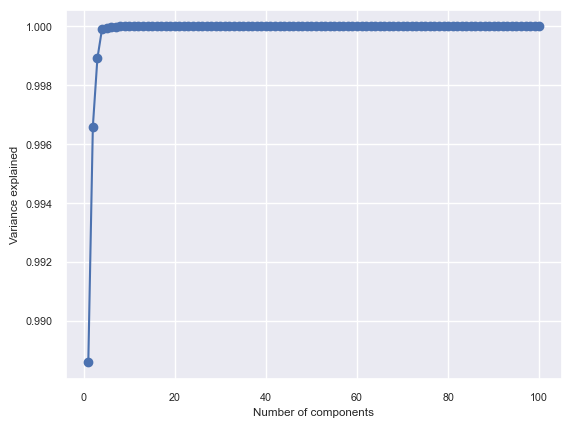

In [41]:
# number of components
k = np.arange(1, len(S)+1)

# variance explained by the first k components
var_exp = np.cumsum(S)/np.sum(S)

# ploting the amount of variance explained by the first k components
plt.figure()
plt.plot(k, var_exp, '-o')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.show()

In the plot above, it is possible to see the cumulative variance explained agains the number of principal components. We can observe that the first principal component explains most of the variance in the data, while the second principal component explains a smaller amount of the variance. The third principal component explains even less of the variance, and so on.

**d) We will use (as an approximation) the first 2 PCs. Plot the projected data using as color the
value of y and interpret the plot.**

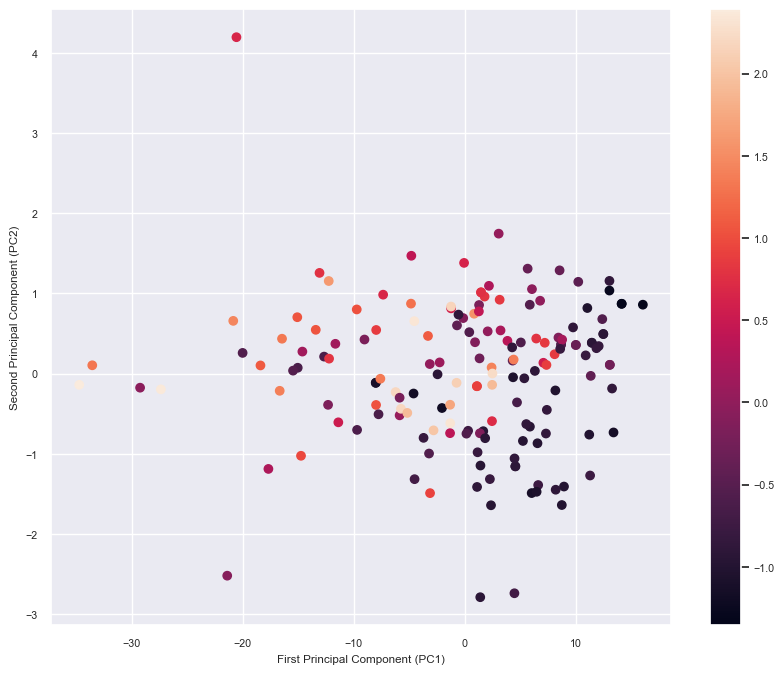

In [42]:
k = 2 # number of components

# project the data onto the first k principal components
proj = X_train @ V.T[:, :k]

# plot the data
plt.figure(figsize=(10, 8))
plt.scatter(proj[:, 0], proj[:, 1], c=y_train)
plt.xlabel("First Principal Component (PC1)")
plt.ylabel("Second Principal Component (PC2)")
plt.colorbar()
plt.show()

In the plot above, the data points are colored according to the value of y. The first principal component (PC1) is plotted on the x-axis, while the second principal component (PC2) is plotted on the y-axis. The first principal component (PC1) is the direction in which the data varies the most, while the second principal component (PC2) is the direction in which the data varies the second most.



**e) Run OLS on the projected data using k components for k evenly spaced in 2..p. Store the best
score in the dataFrame.**

In [43]:
# compute the projected data for both train and test data
X_train_proj = X_train @ V.T[:, :k]
X_test_proj = X_test @ V.T[:, :k]

# regression model
reg = LinearRegression()
reg.fit(X_train_proj, y_train)

# compute the r2 score for each k
r2_train = []
r2_test = []
mse_test = []
mse_train = []

for k in range(1, len(S)+1):
    # project the data onto the first k principal components
    X_train_proj = X_train @ V.T[:, :k]
    X_test_proj = X_test @ V.T[:, :k]

    # regression model
    reg = LinearRegression()
    reg.fit(X_train_proj, y_train)

    # compute the r2 score for each k
    r2_train.append(reg.score(X_train_proj, y_train))
    r2_test.append(reg.score(X_test_proj, y_test))

    # compute the mse for each k
    mse_train.append(mean_squared_error(y_train, reg.predict(X_train_proj)))
    mse_test.append(mean_squared_error(y_test, reg.predict(X_test_proj)))

    # best k
    best_k = np.argmax(r2_test) + 1 # +1 because the index starts from 0

# print the results
print("Results: ")
print('R2 score (test):', np.max(r2_test))
print('R2 score (train):', np.max(r2_train))
print('MSE (test):', np.min(mse_test))
print('MSE (train):', np.min(mse_train))
print('Best k:', best_k)

Results: 
R2 score (test): 0.9774597248460534
R2 score (train): 0.9957887286912356
MSE (test): 0.022634078391191463
MSE (train): 0.004211271308764449
Best k: 84


In [44]:
# adding to the dataframe the results of PCA
df_coef = pd.concat([df_coef, pd.DataFrame({'Method': 'PCA', 'R2 - test': np.max(r2_test),\
                                                                        'R2 - train': np.max(r2_train),\
                                                                        'MSE - test': np.min(mse_test),\
                                                                        'MSE - train': np.min(mse_train)}, index=[0])], ignore_index=True)

**Checking using PCA from sklearn**

In [45]:
k = 2 # number of components

# PCA model
pca = PCA(n_components=k)
pca.fit(X_train)

# compute the projected data for both train and test data
X_train_proj = pca.transform(X_train)
X_test_proj = pca.transform(X_test)

# regression model
reg = LinearRegression()
reg.fit(X_train_proj, y_train)

# compute the r2 score for each k
r2_train = []
r2_test = []
for k in range(1, len(S)+1):
    # PCA model
    pca = PCA(n_components=k)
    pca.fit(X_train)

    # compute the projected data for both train and test data
    X_train_proj = pca.transform(X_train)
    X_test_proj = pca.transform(X_test)

    # regression model
    reg = LinearRegression()
    reg.fit(X_train_proj, y_train)

    # compute the r2 score for each k
    r2_train.append(reg.score(X_train_proj, y_train))
    r2_test.append(reg.score(X_test_proj, y_test))

    # best k
    best_k = np.argmax(r2_test) + 1 # +1 because the index starts from 0

print('Results PCA (sklearn):')
print('R2 score (train):' , np.max(r2_train))
print('R2 score (test):' , np.max(r2_test))
print('Best k:', best_k)

Results PCA (sklearn):
R2 score (train): 0.9957887286912396
R2 score (test): 0.9774597559042215
Best k: 84


# Comparison of the models

**10) Summarize the results of the models and elaborate in their main characteristics**

Below it is possible to see the dataframe with the stored results:

In [46]:
df_coef

,Method,R2 - test,R2 - train,MSE - test,MSE - train
0,Regular OLS,0.960055,0.995789,0.040111,0.004211
1,Forward selection,0.127139,0.314698,0.876493,0.685302
2,Forward selection (sklearn),0.127139,0.314698,0.876493,0.685302
3,Ridge regression,0.967120,0.981929,0.033016,0.018071
4,Lasso regression,0.953712,0.954032,0.046481,0.045968
5,PCA,0.977460,0.995789,0.022634,0.004211


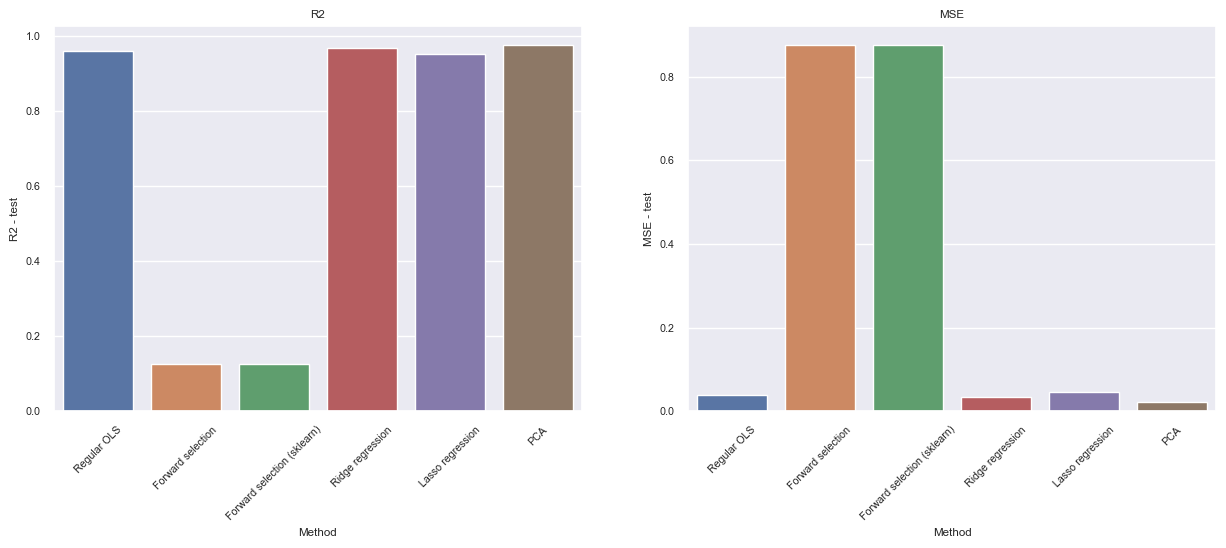

In [47]:
# visualize the metrics for all the methods (barplot) - MSE and R2 = TEST
# plot both the metrics in the same figure
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plot the R2
sns.barplot(x='Method', y='R2 - test', data=df_coef, ax=ax[0])
ax[0].set_title("R2")
plt.setp(ax[0].get_xticklabels(), rotation=45)


# plot the MSE
sns.barplot(x='Method', y='MSE - test', data=df_coef, ax=ax[1])
ax[1].set_title("MSE")
plt.setp(ax[1].get_xticklabels(), rotation=45)

plt.show()

Just considering the R2 and MSE scores that was obtained for each model above, the best model is the PCA regression with 2 components, followed by the Ridge regressio, the Lasso regression and the OLS regression.

Talking about each model used in this notebook:

- **Regular OLS (Ordinary Least Squares):** 
    - Is the simplest method used to estimate the unknown parameters in a linear regression model;
    - It assumes that the errors are normally distributed, and have constant variance;
    - It aims to minimize: $$\hat{\theta}_n \in argmin \left(||Y-Z\theta||_2^2 \right) $$
- **Forward selection:**
    - Build a linear regression model by selecting the best predictors one by one;
    - Starting with a model containing no predictors, it adds the variable that produces the highest increase in the R-squared value, and then repeats the process untill a stopping criterion is met;
    - It can be computationally expensive when there are many predictors;
- **Ridge regression:**
    - It introduces a penalty term to the OLS cost function, which reduces the magnitude of the coefficients;
    - It can be used to improve the stability and accuracy of the estimates when the number of predictors is large and the correlation between them is high;
    - It aims to minimize: $$\hat{\theta}_n \in argmin \left(||Y-Z\theta||_2^2 + \alpha||\theta||^2\right) $$
- **Lasso regression:**
    - It uses a penalty term similar to the Ridge regression, but with a different formulation that results in a sparser set of coefficients;
    - Lasso regression can be used for variable selection, as it can shrink some coefficients to zero, effectively removing them from the model;
    - It aims to minimize: $$\hat{\theta}_n \in argmin \left(\frac{1}{2}||Y-Z\theta||_2^2 + \alpha||\theta||_1\right) $$
- **PCA (Principal Component Analysis):**
    - PCA is a method used to reduce the dimensionality of a dataset by projecting it to a lower dimensional space;
    - It transforms the original features into a set of new orthogonal features, called principal components that capture the maximum variance in the data;